### Задача:

Проанализируйте клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов.

- Проведите исследовательский анализ данных,
- Сегментируйте пользователей на основе данных о количестве потребляемых продуктов,
- Сформулируйте и проверьте статистические гипотезы.

    *Проверьте гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.*

    *Сформулируйте и проверьте статистическую гипотезу относительно представленных данных.*

# Декомпозиция

<a href='#the_destination1'>Шаг 1. Загрзука данных, получение информации о данных и предобработка данных.</a>

   <a href='#the_destination11'>1.1 Проверить название столбцов и поправить для удобства работы их названия, привести к нижнему регистру.</a>
    
   <a href='#the_destination12'>1.2 Работа с типами данных.</a>
    
   <a href='#the_destination13'>1.3 Обработать пропуски и проверить данные на дубликаты.</a>
    
   <a href='#the_destination14'>1.4 Вывод.</a>


<a href='#the_destination2'>Шаг 2. EDA.</a>

   <a href='#the_destination21'>2.1 Проверить данные на аномалии.</a>
    
   <a href='#the_destination22'>2.2 Изучить распределение признаков.</a>
    
   <a href='#the_destination23'>2.3 Корреляционного анализа данных.</a>
    
   <a href='#the_destination24'>2.4 Выводы на основании графиков и корреляционного анализа.</a>


<a href='#the_destination3'>Шаг 3. Сегментировать пользователей на основе данных о количестве потребляемых продуктов.</a>

   <a href='#the_destination31'>3.1 Сегментировать пользователей по кол-ву потребляемых продуктов.</a>
   
   <a href='#the_destination32'>3.2 Сегментация клиентов с по кол-ву исользуемых продуктов с учетом города и пола.</a>
   
   <a href='#the_destination33'> 3.3 Построим графики распределения с учтом кол-во используемых продуктов.</a>

<a href='#the_destination4'>Шаг 4. Сформулировать и проверить статистические гипотезы.</a>

   <a href='#the_destination41'>4.1 Проверьте гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.</a>
       
   <a href='#the_destination42'>4.2 Сформулировать и проверьте статистическую гипотезу относительно представленных данных.</a>

<a href='#the_destination5'>Шаг 5. Общий вывод и рекомендации</a>

In [1]:
#Добавим необходимые бибилиотеки для работы
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

<a id='the_destination1'></a>

# Шаг 1. Загрзука данных, получение информации о данных и предобработка данных.

In [2]:
data_bank = pd.read_csv('C:\\Users\\C\\Documents\\Итоговый проект\\bank_dataset.csv')

display(data_bank.head(10))
print()
print('--------------------------------------------------')
print()
print(data_bank.info())

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0



--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
userid              10000 non-null int64
score               10000 non-null int64
City                10000 non-null object
Gender              10000 non-null object
Age                 10000 non-null int64
Objects             10000 non-null int64
Balance             6383 non-null float64
Products            10000 non-null int64
CreditCard          10000 non-null int64
Loyalty             10000 non-null int64
estimated_salary    10000 non-null float64
Churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


<a id='the_destination11'></a>

### 1.1 Проверить название столбцов и поправить для удобства работы их названия, привести к нижнему регистру.

In [3]:
#приведем столбцы к нижнему регистру
data_bank.columns = map(str.lower, data_bank.columns)
data_bank.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


<a id='the_destination12'></a>

### 1.2 Работа с типами данных.

Данный пункт не требуется выполнять, все форматы корректные.

In [4]:
data_bank.dtypes

userid                int64
score                 int64
city                 object
gender               object
age                   int64
objects               int64
balance             float64
products              int64
creditcard            int64
loyalty               int64
estimated_salary    float64
churn                 int64
dtype: object

<a id='the_destination13'></a>

### 1.3 Обработать пропуски и проверить данные на дубликаты.

In [5]:
# Проверим на дубликаты.
print(data_bank.duplicated().sum())

0


In [6]:
# Чтобы решить как обработать пропущеные значения в столбце баланса посмотрим какое минимальное значение
print('Минимальное ззначение:', data_bank['balance'].min())

Минимальное ззначение: 3768.69


Text(0.5, 1.0, 'График, при заполнении пропусков нулями')

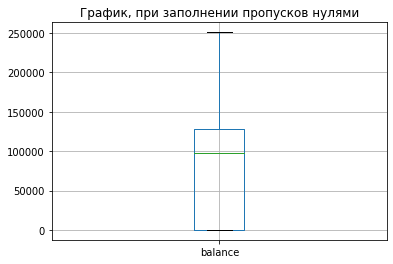

In [7]:
# Заменим пропуски на нули
db_0 = data_bank.fillna(0)
db_0.boxplot(column='balance')
plt.title('График, при заполнении пропусков нулями')

Text(0.5, 1.0, 'График, при не заполнении пропусков нулями')

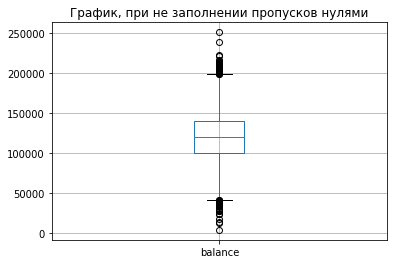

In [8]:
data_bank.boxplot(column='balance')
plt.title('График, при не заполнении пропусков нулями')


При рассмотрения двух графиков при обработанных пропусках (пропуски заменены на ноль) и при не обработанных (с пропущеными значениями) видно , что если не обрабатывать пропуски, то достаточно много значений с не тиичным балансом для клиентов. А если обработать, то нетипичных значений нет. Мое первое утверждение было ошибочным. 

Исходя из этого более логичней запонить пропуски нулями.

In [9]:
data_bank = data_bank.fillna(0)
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
userid              10000 non-null int64
score               10000 non-null int64
city                10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
objects             10000 non-null int64
balance             10000 non-null float64
products            10000 non-null int64
creditcard          10000 non-null int64
loyalty             10000 non-null int64
estimated_salary    10000 non-null float64
churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


<a id='the_destination14'></a>

### 1.4 Вывод.

Данные для дальнейшего анализа готовы, пропуски заменены на нули, заменять типы данных не потребовалось, все типы данных корректные.

<a id='the_destination2'></a>

# Шаг 2. EDA.

<a id='the_destination21'></a>

### 2.1 Проверить данные на аномалии.

In [10]:
data_bank.describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Text(0.5, 1.0, 'Поиск аномалиьных клиентов по столбцу кредтого рейтинга')

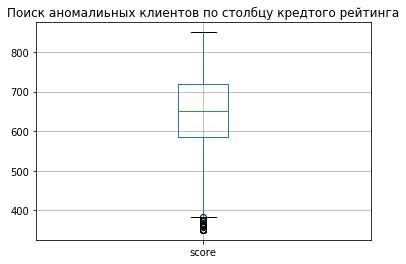

In [11]:
data_bank.boxplot(column = 'score')
plt.title('Поиск аномалиьных клиентов по столбцу кредтого рейтинга')

Text(0.5, 1.0, 'Поиск аномалиьных клиентов по столбцу возраста')

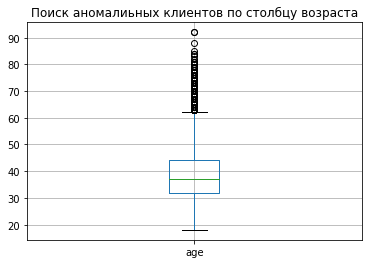

In [12]:
data_bank.boxplot(column = 'age')
plt.title('Поиск аномалиьных клиентов по столбцу возраста')

Text(0.5, 1.0, 'Поиск аномалиьных клиентов по столбцу количества объектов')

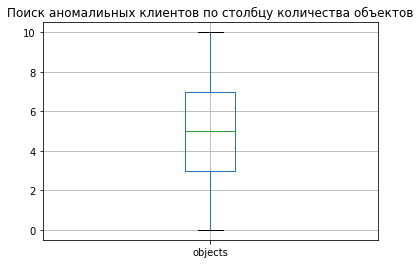

In [13]:
data_bank.boxplot(column = 'objects')
plt.title('Поиск аномалиьных клиентов по столбцу количества объектов')

Text(0.5, 1.0, 'Поиск аномалиьных клиентов по столбцу баланса')

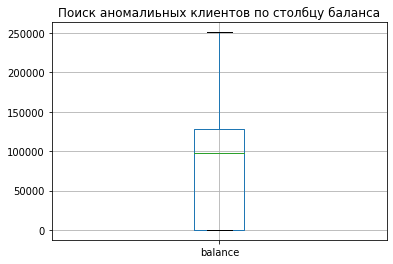

In [14]:
data_bank.boxplot(column = 'balance')
plt.title('Поиск аномалиьных клиентов по столбцу баланса')

Text(0.5, 1.0, 'Поиск аномалиьных клиентов по столбцу наличия кредитной карты')

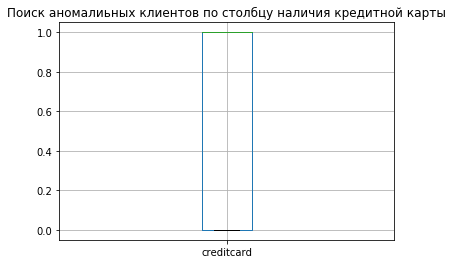

In [15]:
data_bank.boxplot(column = 'creditcard')
plt.title('Поиск аномалиьных клиентов по столбцу наличия кредитной карты')

Text(0.5, 1.0, 'Поиск аномалиьных клиентов по столбцу активности')

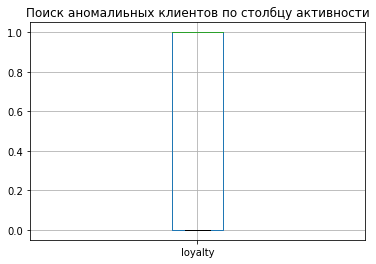

In [16]:
data_bank.boxplot(column = 'loyalty')
plt.title('Поиск аномалиьных клиентов по столбцу активности')

Text(0.5, 1.0, 'Поиск аномалиьных клиентов по столбцу заработной платы')

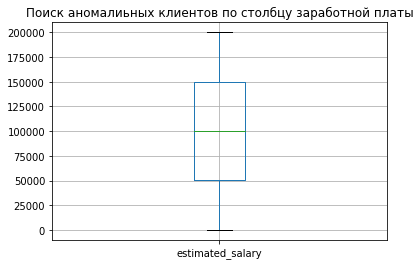

In [17]:
data_bank.boxplot(column = 'estimated_salary')
plt.title('Поиск аномалиьных клиентов по столбцу заработной платы')

Text(0.5, 1.0, 'Поиск аномалиьных клиентов по столбцу оттока клиентов')

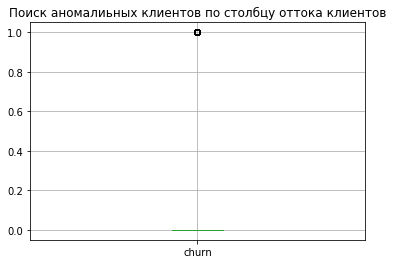

In [18]:
data_bank.boxplot(column = 'churn')
plt.title('Поиск аномалиьных клиентов по столбцу оттока клиентов')


Из графиков видно, можно сделать выводы. Аномальные значения существуют в столбцах с оттоком клиентов, с возрастом и с кредитным рейтингом клиентов.

Получается, что для банка не характерны следующие клиенты:
1. Клиенты у с кредитным рейтингом ниже 300
2. Клиенты в возрасте 62 и старше
3. Для банка не характерен уход клиентов.

<a id='the_destination22'></a>

### 2.2 Изучить распределение признаков

In [19]:
# Посчитаем сколько клиентов используют продуктов.
product_user = data_bank.groupby('products')['userid'].count()
display(product_user.head())

products
1    5084
2    4590
3     266
4      60
Name: userid, dtype: int64

Text(0, 0.5, 'Количество клиентов')

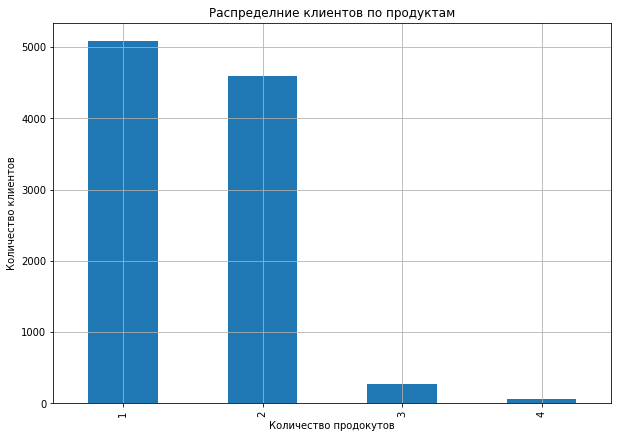

In [20]:
# Посмотрим на графике распределние клиентов по продуктам.
plt.figure(figsize=(10,7))
product_user.plot(kind='bar', grid=True)
plt.title('Распределние клиентов по продуктам')
plt.xlabel('Количество продокутов')
plt.ylabel('Количество клиентов')


Из графика видно, что больше всего клиентов которые пользуются 1 или 2 продуктами.

Text(0.5, 1.0, 'График распределния кредитного рейтинга')

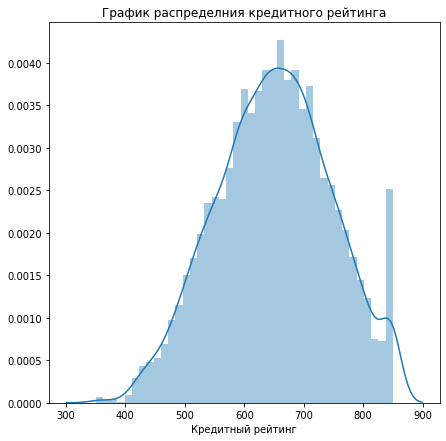

In [21]:
plt.figure(figsize=(7,7))
sns.distplot(data_bank['score'])
plt.xlabel('Кредитный рейтинг')
plt.title('График распределния кредитного рейтинга')

Кредитный рейтинг распределен в целом норамльно, есть в районе 850 пик. Это может говорить о том что группа клиентов имеет max кредитный рейтинг. В среднем у клиентов банка рейтинг от 550-800.

Text(0, 0.5, 'Кол-во объектов')

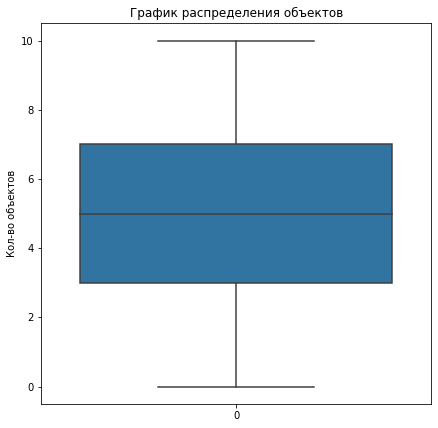

In [22]:
plt.figure(figsize=(7,7))
sns.boxplot(data=data_bank['objects'])
plt.title('График распределения объектов')
plt.ylabel('Кол-во объектов')

По графику видно, что большинство клиентов имеют от 3 до 7 объектов.

Text(0.5, 1.0, 'График распределния клиентов по возврасту')

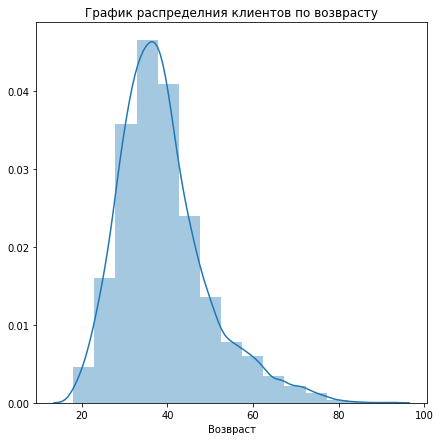

In [23]:
plt.figure(figsize=(7,7))
sns.distplot(data_bank['age'], bins=15)
plt.xlabel('Возвраст')
plt.title('График распределния клиентов по возврасту')

По графику видно, что клиенты банка в массей свойе в возврасте от 25 до 65 лет. Есть не большая доля клиентов младше 20 лет.И присутствуют клиенты старше 70 лет.  

Text(0.5, 1.0, 'График распределния баланса')

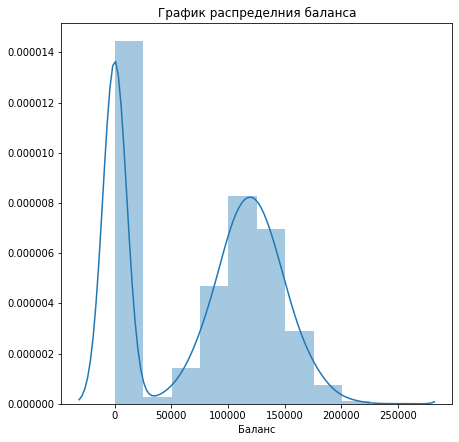

In [24]:
plt.figure(figsize=(7,7))
sns.distplot(data_bank['balance'], bins=10)
plt.xlabel('Баланс')
plt.title('График распределния баланса')

Большинство клиентов с балансом от 80 000 до до 160 000.

Text(0.5, 1.0, 'Распределние заработной платы')

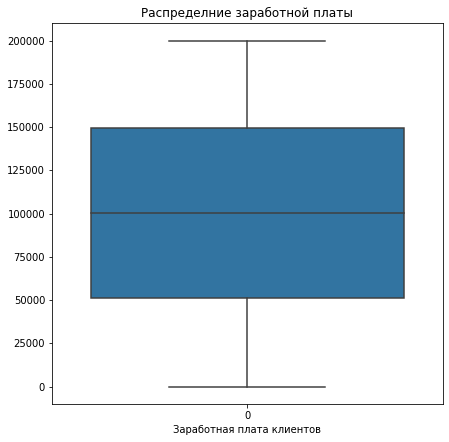

In [25]:
plt.figure(figsize=(7,7))
sns.boxplot(data=data_bank['estimated_salary'])
plt.xlabel('Заработная плата клиентов')
plt.title('Распределние заработной платы')

Большиство клиентов имеют зарпалту от 50000 до 150000 т. рублей.

Text(0.5, 1.0, 'Распределние по наличию кредитной карты')

<Figure size 504x504 with 0 Axes>

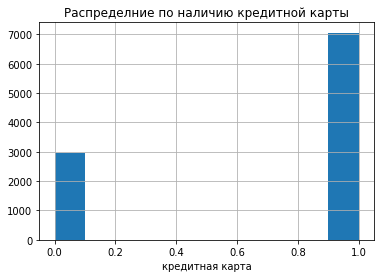

In [26]:
plt.figure(figsize=(7,7))
data_bank.hist(column='creditcard')
plt.xlabel('кредитная карта')
plt.title('Распределние по наличию кредитной карты')

У 7000 клиентов есть крдитная карта.

Text(0.5, 1.0, 'Распределние активность клиентов')

<Figure size 504x504 with 0 Axes>

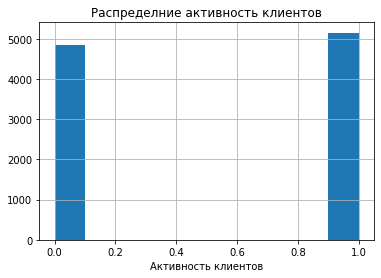

In [27]:
plt.figure(figsize=(7,7))
data_bank.hist(column='loyalty')
plt.xlabel('Активность клиентов')
plt.title('Распределние активность клиентов')

Кол-во активных клиентов и не активных клиентов практически одинакого.

Text(0.5, 1.0, 'Распределние оттока клиентов')

<Figure size 504x504 with 0 Axes>

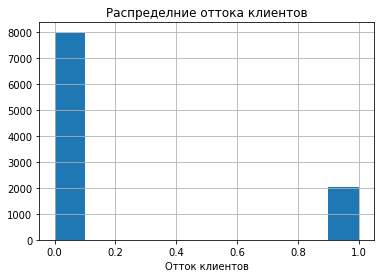

In [28]:
plt.figure(figsize=(7,7))
data_bank.hist(column='churn')
plt.xlabel('Отток клиентов')
plt.title('Распределние оттока клиентов')

Большиство клиентов действующие. В отток попало чуть более 2000.

Text(0.5, 1.0, 'Распределние клиентов по гендерному признаку')

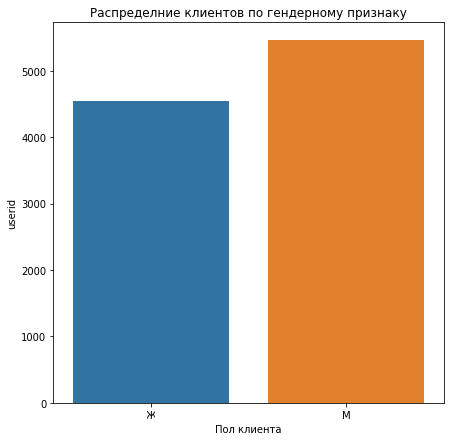

In [29]:
gender = data_bank.groupby('gender').agg({'userid': 'count'}).reset_index()
plt.figure(figsize=(7,7))
sns.barplot(data=gender, x="gender", y="userid")
plt.xlabel('Пол клиента')
plt.title('Распределние клиентов по гендерному признаку')

Среди клиентов банка наблюдается не большое преобладание мужчин 5500. Женщин 4500

Text(0.5, 1.0, 'Распределние клиентов по городам')

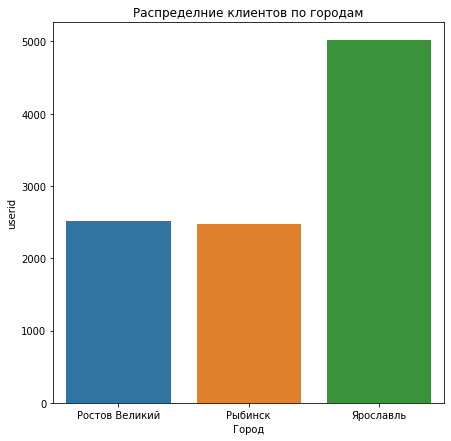

In [30]:
city = data_bank.groupby('city').agg({'userid': 'count'}).reset_index()
plt.figure(figsize=(7,7))
sns.barplot(data=city, x="city", y="userid")
plt.xlabel('Город')
plt.title('Распределние клиентов по городам')

Большиство клиентов 5000 из Ярославля, в Рыбинске и Ростове Вкеликом поровну клиентов.

<a id='the_destination23'></a>

### 2.3 Корреляционного анализа данных

Text(0.5, 1, 'График корреляции')

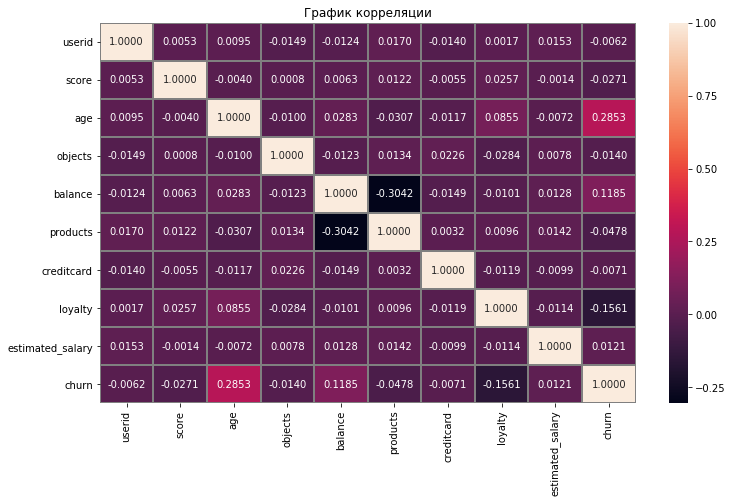

In [31]:
corr_mat = data_bank.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_mat, annot=True, fmt='.4f', linewidths=1, linecolor='gray')
plt.title('График корреляции')


Между собой данные практически не коррелируют. Наблюдается средне положительная корреляция между возврастом и оттоком клиентов.

<a id='the_destination24'></a>

### 2.4 Выводы на основании графиков и корреляционного анализа.

- Между собой данные практически не коррелируют. Наблюдается не большая корреляция между кол-вом продуктов и балансом.

- Большиство клиентов имеют зарпалту от 50000 до 150000 т. рублей. 

- Большинство клиентов с балансом от 80 000 до до 160 000.

- Клиенты банка в массей свойе в возврасте от 25 до 65 лет. Есть не большая доля клиентов младше 20 лет.И присутствуют клиенты старше 70 лет. 

- Большинство клиентов имеют от 3 до 7 объектов.

- Кредитный рейтинг распределен в целом норамльно, есть в районе 850 пик. Это может говорить о том что группа клиентов имеет max кредитный рейтинг. В среднем у клиентов банка рейтинг от 550-800. 

- Больше всего клиентов которые пользуются 1 или 2 продуктами.

### Типичный клиент
Типичный клиент буде возврастом 35 лет, с кредитной картой, с 5 объектами, с зарплатой около 100000, с балансом около 100000, бал крдитного рейтинга 650, мужчина из Ярославля, пользуется одним или двумя продуктами.

<a id='the_destination3'></a>

# Шаг 3. Сегментировать пользователей на основе данных о количестве потребляемых продуктов

<a id='the_destination31'></a>

### 3.1 Сегментировать пользователей по кол-ву потребляемых продуктов.

In [32]:
#Сегментируем клиентов.
product_gr = data_bank.groupby(['products']).agg({'userid':'count', 'score':'mean', 'city':'unique', 'gender':'unique',
                                                  'age':'mean', 'objects':'mean', 'balance':'mean', 'creditcard':'sum', 
                                                  'loyalty':'sum', 'estimated_salary':'mean', 'churn':'mean'}).reset_index()
product_gr

,products,userid,score,city,gender,age,objects,balance,creditcard,loyalty,estimated_salary,churn
0,1,5084,649.120968,"[Ярославль, Рыбинск, Ростов Великий]","[Ж, М]",39.673092,4.974626,98551.870614,3578,2563,99487.256851,0.277144
1,2,4590,652.188671,"[Ярославль, Рыбинск, Ростов Великий]","[Ж, М]",37.753595,5.051852,51879.145813,3246,2446,100452.012821,0.075817
2,3,266,648.105263,"[Ярославль, Рыбинск, Ростов Великий]","[Ж, М]",43.195489,5.003759,75458.328195,190,113,104318.130564,0.827068
3,4,60,653.583333,"[Ростов Великий, Ярославль, Рыбинск]","[Ж, М]",45.683333,5.300000,93733.135000,41,29,104763.723333,1.000000


### 3.2 Сегментация клиентов с по кол-ву исользуемых продуктов с учетом города и пола.

In [33]:
product_gr1 = data_bank.groupby(['products', 'city', 'gender']).agg({'userid':'count', 'score':'mean',
                                                  'age':'mean', 'objects':'mean', 'balance':'mean', 'creditcard':'sum', 
                                                  'loyalty':'sum', 'estimated_salary':'mean', 'churn':'mean'}).reset_index()
product_gr1

,products,city,gender,userid,score,age,objects,balance,creditcard,loyalty,estimated_salary,churn
0,1,Ростов Великий,Ж,664,654.456325,40.668675,5.072289,119787.702274,468,291,104585.412620,0.471386
1,1,Ростов Великий,М,685,648.442336,40.478832,4.940146,119946.482263,484,338,97581.683314,0.386861
2,1,Рыбинск,Ж,516,649.691860,39.955426,4.947674,88671.822190,359,276,100750.782733,0.267442
3,1,Рыбинск,М,705,648.371631,39.520567,4.978723,92003.248596,482,397,98204.348922,0.182979
4,1,Ярославль,Ж,1116,646.913082,39.685484,4.896057,86834.008638,786,568,97898.909149,0.278674
5,1,Ярославль,М,1398,648.849070,38.768240,5.015737,94285.859363,999,693,99448.064585,0.180973
6,2,Ростов Великий,Ж,462,652.279221,38.922078,4.885281,118176.420671,326,240,98056.437208,0.162338
7,2,Ростов Великий,М,578,650.955017,37.743945,5.136678,120272.298426,423,328,103050.633080,0.088235
8,2,Рыбинск,Ж,527,654.605313,38.170778,5.058824,31899.553719,382,270,100535.893909,0.100569
9,2,Рыбинск,М,656,653.689024,37.685976,5.160061,33326.545610,452,339,98713.911067,0.051829


<a id='the_destination33'></a>

### 3.3 Построим графики распределения с учтом кол-во используемых продуктов.

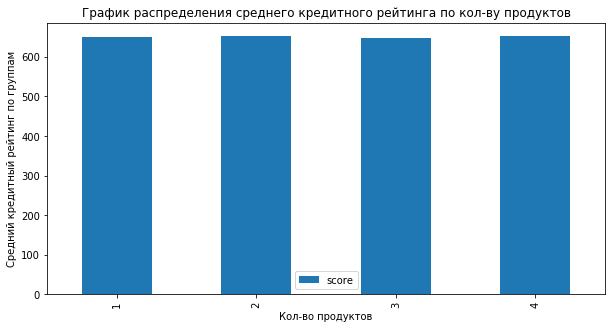

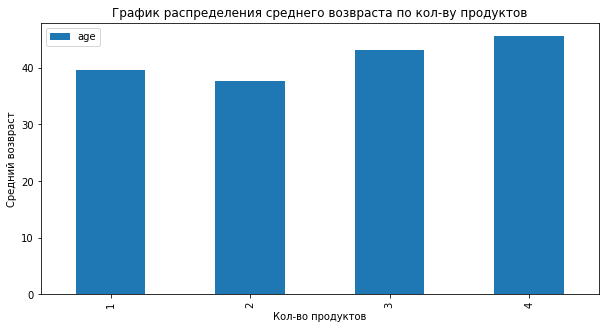

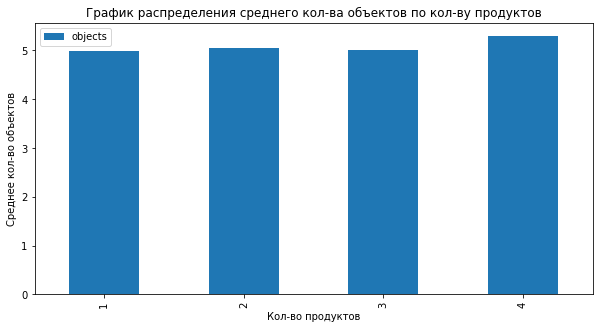

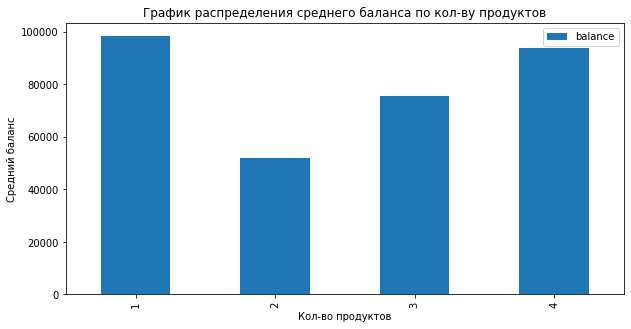

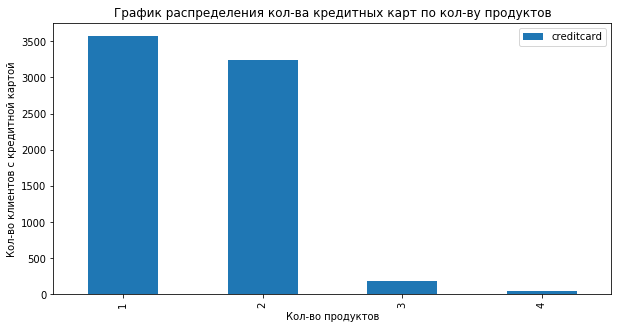

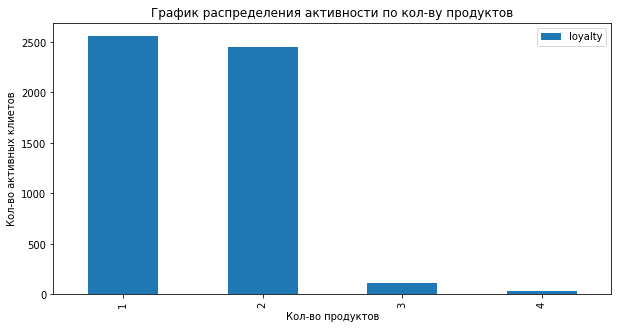

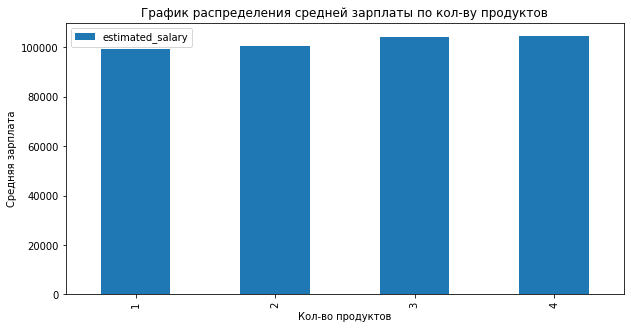

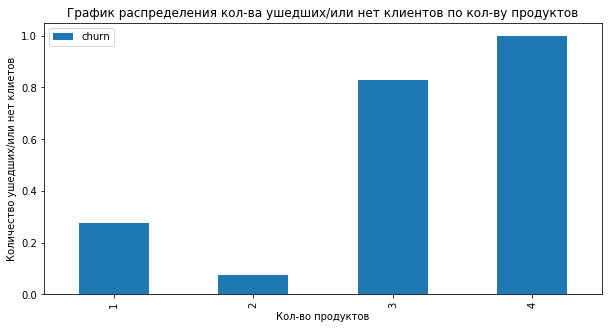

In [35]:
# построим графики распределения.
col = ['score', 'age', 'objects', 'balance', 'creditcard', 'loyalty', 'estimated_salary', 'churn']
y_label = ['Средний кредитный рейтинг по группам', 'Средний возвраст', 'Среднее кол-во объектов',
          'Средний баланс', 'Кол-во клиентов с кредитной картой', 'Кол-во активных клиетов', 
          'Средняя зарплата', 'Количество ушедших/или нет клиетов'
          ]
title = ['График распределения среднего кредитного рейтинга по кол-ву продуктов',
         'График распределения среднего возвраста по кол-ву продуктов',
         'График распределения среднего кол-ва объектов по кол-ву продуктов',
         'График распределения среднего баланса по кол-ву продуктов',
         'График распределения кол-ва кредитных карт по кол-ву продуктов',
         'График распределения активности по кол-ву продуктов',
         'График распределения средней зарплаты по кол-ву продуктов',
         'График распределения кол-ва ушедших/или нет клиентов по кол-ву продуктов'
        ]
count = 0

for q in col:
    product_gr.plot(x="products", y=q, kind='bar', figsize=(10,5))
    plt.xlabel('Кол-во продуктов')
    plt.ylabel(y_label[count])
    plt.title(title[count])
    count += 1

Text(0.5, 1.0, 'График распределения групп по гендерному признаку')

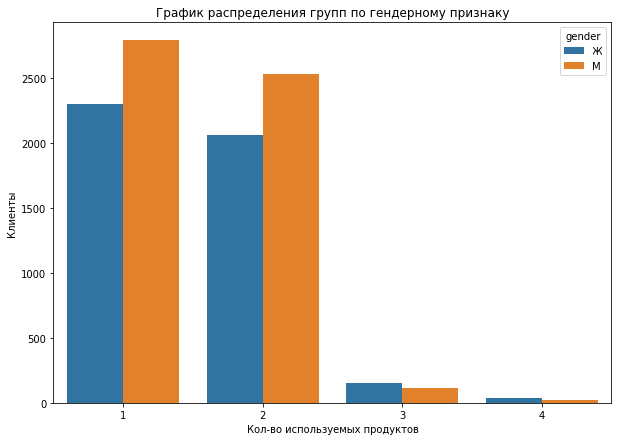

In [36]:
# построим шграфик распределния клиентов по гендерному признаку
prod_gender = data_bank.groupby(['products', 'gender']).agg({'userid':'count'}).reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=prod_gender, x="products", y="userid", hue="gender")
plt.ylabel('Клиенты')
plt.xlabel('Кол-во используемых продуктов')
plt.title('График распределения групп по гендерному признаку')


По 'Графику распределения пола по группам’ видно, клиентов мужчин немного больше, чем женщин в группах 1 и 2. В группах 3 и 4 этот показатель одинаков.

Text(0.5, 1.0, 'График распределения групп по городам')

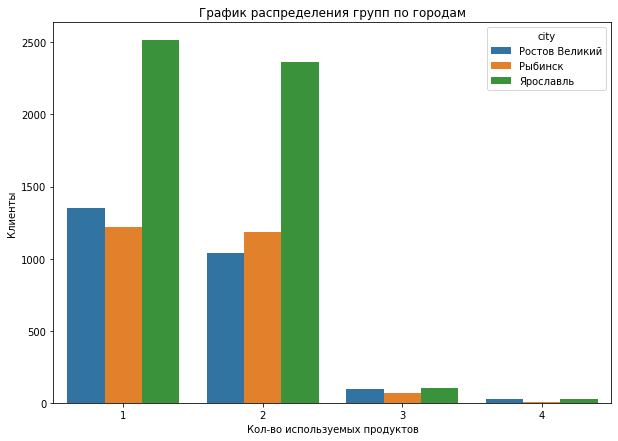

In [38]:
#Построим график распределения клиентов по городам
prod_city = data_bank.groupby(['products', 'city']).agg({'userid':'count'}).reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=prod_city, x="products", y="userid", hue="city")
plt.ylabel('Клиенты')
plt.xlabel('Кол-во используемых продуктов')
plt.title('График распределения групп по городам')

Клиенты распределны в городах Ростов Великий и Рыбинск одинагого, в Ярославле клиентов гораздо больше у первой и второй группы. 3 и 4 группы по все трем городам распределны клиенты одинакого.

Text(0.5, 1.0, 'График распределения групп ушедшим клиентам')

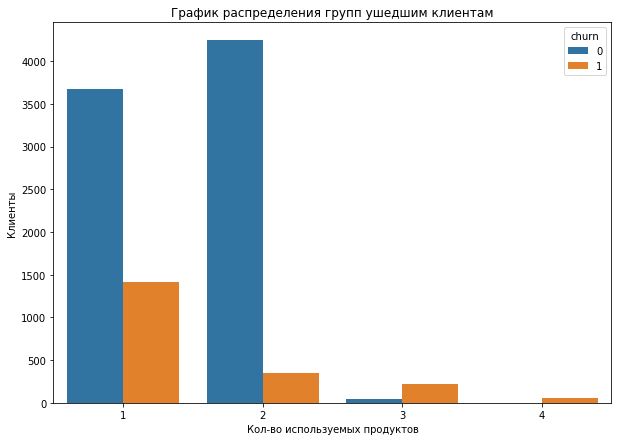

In [39]:
# Построим график распределения ушедших/не ушдших клиентов
prod_churn = data_bank.groupby(['products', 'churn']).agg({'userid':'count'}).reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=prod_churn, x="products", y="userid", hue="churn")
plt.ylabel('Клиенты')
plt.xlabel('Кол-во используемых продуктов')
plt.title('График распределения групп ушедшим клиентам')

Из графика видно, что в первых двух группах клиенты с признаком churn=0 преобладают. В третьей и четвертой группе преобладает признак churn=1. В 3 и 4 группе наблюдается отток. Так же в первой группе по сравнению со второй достаточно высокий отток.

Text(0.5, 1.0, 'График распределения групп по активности клиентов')

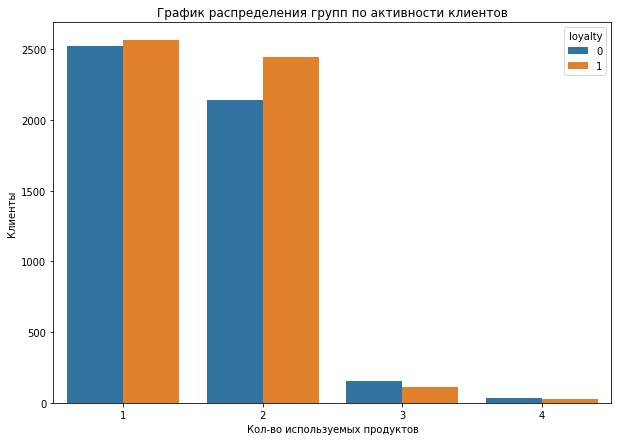

In [40]:
# Построим график распределния по лояльности клиентов
prod_loyalty = data_bank.groupby(['products', 'loyalty']).agg({'userid':'count'}).reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=prod_loyalty, x="products", y="userid", hue="loyalty")
plt.ylabel('Клиенты')
plt.xlabel('Кол-во используемых продуктов')
plt.title('График распределения групп по активности клиентов')

Из графиков видно, что активность клиентов по группам распределна практически одинакого.

### Вывод
Клиенты поделены на 4 группы. Первая и вторая группы большие 5084 и 4590 соответственно. Третья и четвертые группы маленькие 266 и 60 человек соответственно. Во всех группах активных и не активных клиентов приблизительно одинаковое кол-во. Из графика видно, что в первых двух группах клиенты с признаком churn=0 преобладают. В третьей и четвертой группе преобладает признак churn=1. Во всех группах клиентов больше из города Ярославль. По гендерному признаку среи клиентов преобладают мужчины. Средний кредитный рейтинг, возраст, кол-во объектов практически одинакого по всем группам. Баланс больше у клиентов 1 и 4 группы. Зарплата усех групп практически одинаковая.

<a id='the_destination4'></a>

# Шаг 4. Сформулировать и проверить статистические гипотезы.


Для проверки гипотез, и выбора критери проверки, необходимо проверить распределние нормальное или нет. Воспользуемся критерием Шапиро-Уилка.

In [41]:
h_0 = 'Не получилось отвергнуть нулевую гипотезу, распределние нормально'
h_1 = 'Отвергаем нулевую гипотезу: распределение не нормально'

alpha = 0.05 # критический уровень статистической значимости

res = st.shapiro(data_bank['estimated_salary'])
p_value = res[1] 

print('p-значение: ', p_value)

if (p_value < alpha):
    print(h_1)
else:
    print(h_0) 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Т.к.распределение не нормально, для проверки гепотезы используем критерий Уилкоксона-Манна-Уитни

<a id='the_destination41'></a>

### 4.1 Проверьте гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Сформулируем гипотезы для теста:

h_0 - Доходы клиентов которые пользуются одним и двумя продуктами - равны

h_1 - Доходы клиентов которые пользуются одним и двумя продуктами - не равны

In [42]:
#Для проведения теста, создадим таблицы с клиентами, которые пользуются одним и двумя продуктами.
product_1 = data_bank.query('products == 1')
print('Таблица с клиентами пользующимеся 1 продуктом:')
display(product_1.head())
print()
print('Таблица с клиентами пользующимеся 2 продуктами:')
product_2 = data_bank.query('products == 2')
display(product_2.head())

Таблица с клиентами пользующимеся 1 продуктом:


,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0
16,15780188,653,Ростов Великий,М,58,1,132602.88,1,1,0,5097.67,1



Таблица с клиентами пользующимеся 2 продуктами:


,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,93826.63,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,0.00,2,1,1,10062.80,0
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
10,15810557,528,Ярославль,М,31,6,102016.72,2,0,0,80181.12,0


In [43]:
# Провдоим тест.

h_0 = 'Не получилось отвергнуть нулевую гипотезу: доходы клиентов, которые пользуются одним и двумя продуктами - равны'
h_1 = 'Отвергаем нулевую гипотезу: доходы клиентов, которые пользуются одним и двумя продуктами - не равны'


res_m_wh = st.mannwhitneyu(product_1['estimated_salary'], product_2['estimated_salary'])

print('p-значение: ', res_m_wh.pvalue)

if (res_m_wh.pvalue < alpha):
    print(h_1)
else:
    print(h_0) 


p-значение:  0.20397833259638254
Не получилось отвергнуть нулевую гипотезу: доходы клиентов, которые пользуются одним и двумя продуктами - равны


<a id='the_destination42'></a>

### 4.2 Сформулировать и проверьте статистическую гипотезу относительно представленных данных.

Сравним кредитный ретиг клиентов из групп, которые пользуются одним или двумя продуктами. Исходя из графика "График распределния кредитного рейтинга" данные имеют нормальное распределние, независимые - используем t-критерий Стьюдента.  Сформулируем гипотезы:

h_0 - кредитный ретиг клиентов, которые пользуются одним и двумя продуктами - равны

h_1 - кредитный ретиг клиентов, которые пользуются одним и двумя продуктами - не равны

In [44]:
h_0 = 'Не получилось отвергнуть нулевую гипотезу: кредитный ретиг клиентов, которые пользуются одним и двумя продуктами - равны'
h_1 = 'Отвергаем нулевую гипотезу: кредитный ретиг клиентов, которые пользуются одним и двумя продуктами - не равны'

res_t_test_score = st.ttest_ind(product_1['score'], product_2['score'])

print('p-значение:', res_t_test_score.pvalue)

if (res_t_test_score.pvalue < alpha):
    print(h_1)
else:
    print(h_0) 

p-значение: 0.1191143371309672
Не получилось отвергнуть нулевую гипотезу: кредитный ретиг клиентов, которые пользуются одним и двумя продуктами - равны


Сравним возвраст клиентов из групп, которые пользуются одним или двумя продуктами. Исходя из графика "График распределния возвраста" данные имеют нормальное распределние, независимые - используем t-критерий Стьюдента.  Сформулируем гипотезы:

h_0 - возвраста клиентов, которые пользуются одним и двумя продуктами - равны

h_1 - возвраста клиентов, которые пользуются одним и двумя продуктами - не равны

In [45]:
h_0 = 'Не получилось отвергнуть нулевую гипотезу: возраста клиентов, которые пользуются одним и двумя продуктами - равны'
h_1 = 'Отвергаем нулевую гипотезу: возраста клиентов, которые пользуются одним и двумя продуктами - не равны'

res_t_test_age = st.ttest_ind(product_1['age'], product_2['age'])

print('p-значение:', res_t_test_age.pvalue)

if (res_t_test_age.pvalue < alpha):
    print(h_1)
else:
    print(h_0) 

p-значение: 1.730821607368763e-19
Отвергаем нулевую гипотезу: возраста клиентов, которые пользуются одним и двумя продуктами - не равны


<a id='the_destination5'></a>

# Шаг 5. Общий вывод и рекомендации

Описание клиентов по группам использования продуктов:

1. Клиенты первой группы  их всего 5084. Их средний кредитный рейтинг 649,12. Они проживают в трех городах Ярославль, Рыбинск, Ростов Великий. Мужчина или женщина в возрасте 39 лет. Имеет 5 объектов. Имеют в среднем баланс 120000 т. Клиенты первой группы как правило имеют кредитную карту. Активны из них только 50%, с доходом 100000. 1409 из них отточные.


2. Клиенты второй группы их 4590. Со средним кредитным рейтингом 652,18. Проживают в городах Ярославль, Рыбинск, Ростов Великий. Мужчина или женщина, в среднем им 37 лет, 5 объектов в пользовании. Со средним балансом на счету в районе 120000. Активных клиентов 2446, со средним доходом 100452,01. Ушедших клиентов 348.


3. Клиенты третьей группы их 266. Со средним кредитным рейтингом 648,11. Проживают в городах Ярославль, Рыбинск, Ростов Великий. Мужчина или женщина со средним возвратом 43 года, 5 объектов в пользовании. Кредитные карты есть только у 190. Активными считаются 113 человек.


4. Клиенты четвертой группы 60 человек. Проживают в городах Ярославль, Рыбинск, Ростов Великий. Мужчина или женщина со средним возвратом 45 лет. Имеют 5 объектов в пользовании. Со средним балансом 122260,61. Кредитную карту имеют 41 человек. Активных клиентов 29. Со средним доходом 104763,72. Все являются ушедешими.




Выводы по графикам:

- На 'График распределения среднего кредитного рейтинга по кол-ву продуктов'  видно, что в средний всех групп кредитный рейтинг практически одинаковый. 


- Из 'Графика распределения среднего возраста по кол-ву продуктов' возраст клиентов около 40 лет. При этом группы 1 и 2 немного моложе групп 3 и 4.


- По 'Графику распределения среднего кол-ва объектов по кол-ву продуктов' видно, что все клиенты групп имеют одинаковое кол-во объектов.


- 'График распределения среднего баланса по кол-ву продуктов' баланс у всех групп одинаковый.


- 'График распределения кол-ва кредитных карт по кол-ву продуктов'  У первой и второй группы их кол-во преобладает. Это связано с тем, что группы 1 и 2 в разы больше групп 3 и 4.


- 'График распределения активности по кол-ву продуктов' аналогичная картина  как и с кредитными картами


- 'График распределения средней зарплаты по кол-ву продуктов' средняя доход в целом одинаковый по всем группам 


- 'График распределения кол-ва ушедших/или нет клиентов по кол-ву продуктов'  из данного графика видно, что большинство клиентов ушло в первой группе.


- По 'Графику распределения пола по группам’ видно, клиентов мужчин немного больше, чем женщин в группах 1 и 2. В группах 3 и 4 этот показатель одинаков.


- Из 'Графика распределения групп по городам '  большинство клиентов живет в городе Ярославль.


- Из 'График распределения групп по ушедшим и оставшимся клиентам' видно, что в первых двух группах клиенты с признаком churn=0 преобладают. В третьей и четвертой группе преобладает признак churn=1. В 3 и 4 группе наблюдается отток. Так же в первой группе по сравнению со второй достаточно высокий отток. 


- Из 'График распределения групп по активности клиента (группы по-парно слева направо)' видно, что активность клиентов по группам распределена практически одинокого.



Рекомендации:

1.	Собрать обратную связь с ушедших клиентов. Особенно из группы, которые пользуются 4 продуктами
2.	Повышать активность клиентов, т.к. она практически 50% во всех группах
3.	Поиск новых клиентов в городах Рыбинск и Ростов Великий
4.	Привлекать клиентов возрасте от 25 – 30 лет.
5.	Т.к. кредитный рейтинг достаточно высок предлагать кредитные карты или кредиты клиентам всех групп.
